In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv('/content/drive/MyDrive/ML_Dataset_CO2Emission.csv - ML_Dataset_CO2Emission.csv.csv')

In [9]:
data.head()

,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


In [10]:
data.shape

(1067, 4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_Size       1067 non-null   float64
 1   Cylinders         1067 non-null   int64  
 2   Fuel_Consumption  1067 non-null   float64
 3   CO2_Emissions     1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


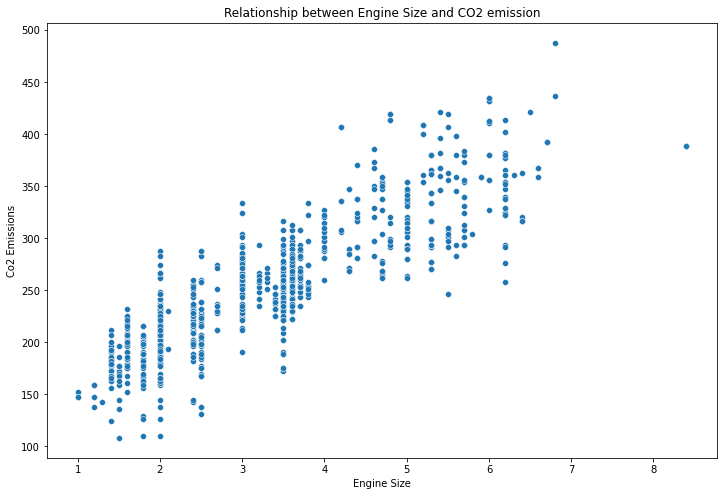

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data.Engine_Size, data.CO2_Emissions)
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.title('Relationship between Engine Size and CO2 emission')
plt.show()

In [13]:
data.Cylinders.unique()

array([ 4,  6, 12,  8, 10,  3,  5])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


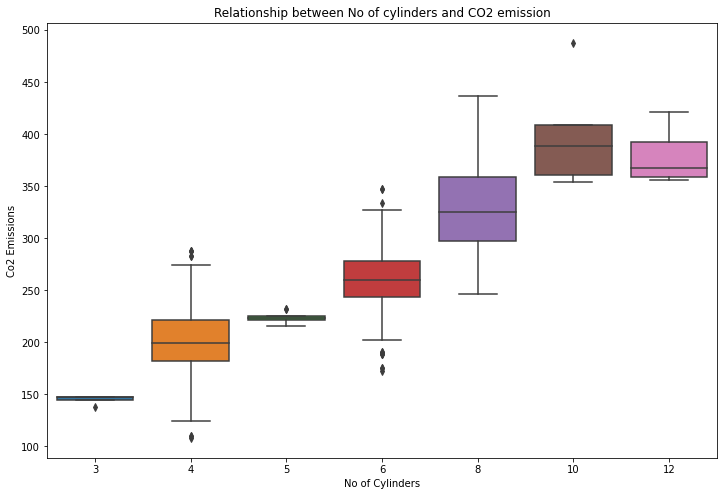

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data.Cylinders, data.CO2_Emissions)
plt.xlabel('No of Cylinders')
plt.ylabel('Co2 Emissions')
plt.title('Relationship between No of cylinders and CO2 emission')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


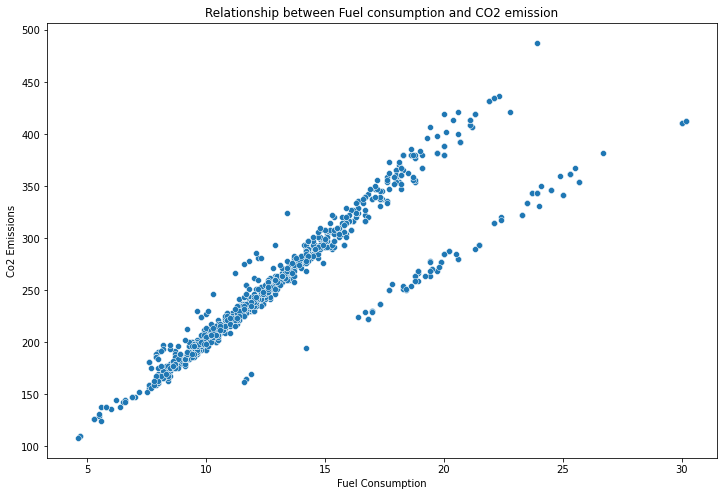

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(data.Fuel_Consumption, data.CO2_Emissions)
plt.xlabel('Fuel Consumption')
plt.ylabel('Co2 Emissions')
plt.title('Relationship between Fuel consumption and CO2 emission')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


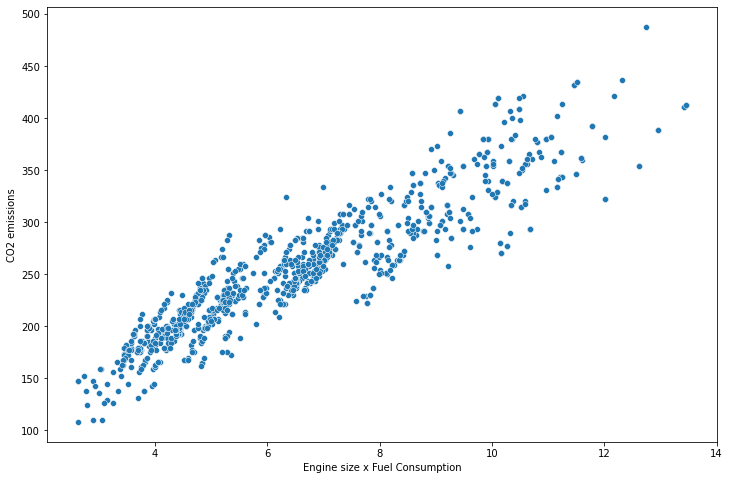

In [16]:
#x=(data.Fuel_Consumption-data.Fuel_Consumption.mean())/data.Fuel_Consumption.std()


plt.figure(figsize=(12,8))
sns.scatterplot(np.sqrt(data.Engine_Size*data.Fuel_Consumption), data.CO2_Emissions)
plt.xlabel('Engine size x Fuel Consumption')
plt.ylabel('CO2 emissions')
#plt.title('Relationship between Fuel consumption and Engine size')
plt.show()

In [17]:
X = data.copy()
y = X.pop('CO2_Emissions')

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)
pred_1 = model_1.predict(X_test)
print('r2 score: ', r2_score(y_test, pred_1))
print('Mean squared error: ', mean_squared_error(y_test, pred_1))

r2 score:  0.876990686099112
Mean squared error:  508.63680865561315


In [21]:
model_2 = LinearRegression()
model_2.fit(X_train[['Engine_Size']],y_train)
pred_2 = model_2.predict(X_test[['Engine_Size']])
print('r2 score: ', r2_score(y_test, pred_2))
print('Mean squared error: ', mean_squared_error(y_test, pred_2))

r2 score:  0.7615595731934373
Mean squared error:  985.9381692274999


In [22]:
X_train_1 = X_train.copy()
X_train_1['new'] = np.sqrt(X_train.Engine_Size*X_train.Fuel_Consumption)

X_test_1 = X_test.copy()
X_test_1['new'] = np.sqrt(X_test.Engine_Size*X_test.Fuel_Consumption)

In [23]:
model_3 = LinearRegression()
model_3.fit(X_train_1[['Engine_Size','new','Cylinders','Fuel_Consumption']],y_train)
pred_3 = model_3.predict(X_test_1[['Engine_Size','new','Cylinders','Fuel_Consumption']])
print('r2 score: ', r2_score(y_test, pred_3))
print('Mean squared error: ', mean_squared_error(y_test, pred_3))

r2 score:  0.8798205589622885
Mean squared error:  496.9354386017407
